## Pontos que seram analisados:
* Nesse estudo, qual a proporção entre crianças do sexo M/F?
* Qual foi o diagnostico das crianças separadas por sexo?
* Quais os paises nesses estudo que tiveram maior número de autistas?
* Quem possuia parentes com autismo,tem mais chance de ter autismo?
* Como o resultado do teste está relacionado com o autismo?
* Como as variáveis comportamentais estão relacionadas com o autismo?
* Como as variáveis de comportamento estão relacionadas entre si?

Esses são os pontos que inicialmente serão analisados nesse estudo.

In [3]:
# Instalando a biblioteca plotly
!pip install plotly

    100% |████████████████████████████████| 41.5MB 1.2MB/s eta 0:00:01    40% |█████████████                   | 16.8MB 1.2MB/s eta 0:00:21
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [4]:
# Importando bibliotecas
from asd import dataset
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [5]:
# Criando o dataframe
df = dataset.autism()
df.set_index('id',inplace = True)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
3,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
4,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
5,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [6]:
# Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1 to 292
Data columns (total 21 columns):
A1_Score           292 non-null int64
A2_Score           292 non-null int64
A3_Score           292 non-null int64
A4_Score           292 non-null int64
A5_Score           292 non-null int64
A6_Score           292 non-null int64
A7_Score           292 non-null int64
A8_Score           292 non-null int64
A9_Score           292 non-null int64
A10_Score          292 non-null int64
age                292 non-null object
gender             292 non-null object
ethnicity          292 non-null object
jundice            292 non-null object
austim             292 non-null object
contry_of_res      292 non-null object
used_app_before    292 non-null object
result             292 non-null int64
age_desc           292 non-null object
relation           292 non-null object
Class/ASD          292 non-null object
dtypes: int64(11), object(10)
memory usage: 50.2+ KB


In [7]:
# Função para conversão de valores em porcentagem
def porcentagem(x):
    x = np.array(x)
    p = (x/sum(x))*100
    p_m = ['{}%'.format(round(i,2)) for i in p]
    return p_m
x = df['gender'].value_counts()
test = porcentagem(x)
print(list(x))
test

[208, 84]


['71.23%', '28.77%']

### Proporção entre crianças do sexo M/F

In [8]:
from plotly.graph_objs import Layout

#Gráfico de comparação de amostras M/F
data = [go.Bar(x = ['Masculino','Feminino'],
               y = df['gender'].value_counts(),
               text = porcentagem(df['gender'].value_counts()),
               textposition = 'auto')]

#layout = go.Layout(yaxis = dict(tickformat=".2%"))

py.iplot({
"data": data,
"layout": Layout(
    title="Distribuição masculino/feminino na amostra",
    xaxis=dict(title="Sexo"),
    yaxis=dict(title="Quantidade de crianças")
)
})


### Diagnóstico de autismo separado por sexo

In [9]:
# Função para conversão de valores em porcentagem
def porcentagem2d(x,y,v):
    aux = []
    for t in range(0,2):
        #print(t)
        #print(x[t])
        #print(y[t])
        x2 = np.array([x[t],y[t]])
        #print(x2)
        p = (x2/sum(x2))*100
        #print(p)
        p_m = ['{}%'.format(round(i,2)) for i in p]
        #print(p_m)
        aux.append(p_m)
    print(aux)
    if v == 0:
        return [aux[0][0], aux[1][0]]
    elif v == 1:
        return [aux[0][1], aux[1][1]]
#x = df['gender'].value_counts()
x = [105, 103]
y = [46, 38]
#test = porcentagem2d(x, y, 0)
#print(list(x))
test

['71.23%', '28.77%']

In [10]:
#Separando dataframe por sexo
masc = df.query('gender == "m"')
fem = df.query('gender == "f"')

# Criando estrutura para armazenar Classe/ASD
autismo_m = masc['Class/ASD'].value_counts().to_dict()
autismo_f = fem['Class/ASD'].value_counts().to_dict()

print(autismo_m)
print(autismo_f)

# Substituindo valores de classe NO -> NO-Autism, YES -> Autism

new_x = [x for x in autismo_m.keys()]
for i,v in enumerate(new_x):
    if v == 'NO':
        new_x[i] = v.replace('NO','Não-Autista')
    elif v == 'YES':
        new_x[i] = v.replace('YES','Autista')
        
# Gráfica de representação

print (porcentagem2d(list(autismo_m.values()), list(autismo_f.values()), 0))

trace_m = go.Bar(x   = new_x,
                 y = list(autismo_m.values()),
                 text = porcentagem2d(list(autismo_m.values()), list(autismo_f.values()), 0),
                 textposition = 'auto',
                 name = 'Masculino')

trace_f = go.Bar(x = new_x,
                 y = list(autismo_f.values()),
                 text = porcentagem2d(list(autismo_m.values()), list(autismo_f.values()), 1),
                 textposition = 'auto',
                 marker = dict(
                    color = 'orange'
                 ),
                 name = 'Feminino')

data1 = [trace_m, trace_f]
#data2 = [trace_f]

layout1 = go.Layout(barmode = 'group')
#layout2 = go.Layout(barmode = 'stack')

fig1 = go.Figure(data=data1, layout = layout1)
#fig2 = go.Figure(data=data2, layout = layout2)
py.iplot(fig1)
#py.iplot(fig2)

{'NO': 105, 'YES': 103}
{'NO': 46, 'YES': 38}
[['69.54%', '30.46%'], ['73.05%', '26.95%']]
['69.54%', '73.05%']
[['69.54%', '30.46%'], ['73.05%', '26.95%']]
[['69.54%', '30.46%'], ['73.05%', '26.95%']]


### Os 5 países com maior incidencia de autismo no dataset


In [11]:
# Filtrando dataframe apenas para crianças autistas
df_aut = df[df['Class/ASD'] == "YES"]

#Armazenando a quantidade em ordem crescente do número de autistas por paises.
contry = df_aut['contry_of_res'].value_counts().sort_values(ascending = False)
country = df['contry_of_res'].value_counts().sort_values(ascending = False)

# COnstruindo o gráfico
data2 = [go.Bar(x = contry[:5],
                y = contry.index[:5],
                text = porcentagem(contry[:5]),
                textposition = 'auto',
                orientation = 'h')]

py.iplot({
"data": data2,
"layout": Layout(
    title="Os 5 países com maior incidência de autismo na amostra",
    xaxis=dict(title="Quantidade de autistas"),
    yaxis=dict(title="")
)
})

data3 = [go.Bar(x = country[:5],
                y = country.index[:5],
                text = porcentagem(country[:5]),
                textposition = 'auto',
                orientation = 'h')]

py.iplot({
"data": data3,
"layout": Layout(
    title="Países com mais participantes",
    xaxis=dict(title="Quantidade de autistas"),
    yaxis=dict(title="")
)
})


### Herança genética das crianças com autismo

O fato de ter alguém com autismo na família pode indicar que outras pessoas nessa família teram autismo?

In [12]:
# Agrupando casos de autismo em parentes com os pacientes analisados do dataset
parentes = df.groupby('austim')['Class/ASD'].value_counts()

com_parente_e_autista = parentes['yes']['YES']
sem_parente_e_autista = parentes['no']['YES']
com_parente_e_nao_autista = parentes['yes']['NO']
sem_parente_e_nao_autista =  parentes['no']['NO']


total_nao_autista = com_parente_e_nao_autista + sem_parente_e_nao_autista
total_autista = com_parente_e_autista + sem_parente_e_autista

g1 = [sem_parente_e_nao_autista/total_nao_autista, sem_parente_e_autista/total_autista ]
g2 = [com_parente_e_nao_autista/total_nao_autista, com_parente_e_autista/total_autista]

def percent_format(x):
    return '{:.2f}%'.format(100 * x)

# Criando gráfico para visualização
trace_psa = go.Bar(x = new_x,
                  y = list(parentes[:2]),
                  text = [percent_format(x) for x in g1],
                  textposition = 'auto',
                  name = 'Parente sem autismo')

trace_pca = go.Bar(x = new_x,
                  y = list(parentes[2:]),
                  text = [percent_format(x) for x in g2],
                  textposition = 'auto',
                  name = 'Parente com autismo')

data3 = [trace_psa,trace_pca]

layout2 = go.Layout(barmode = 'group')

fig2 = go.Figure(data=data3, layout = layout2)

py.iplot(fig2)

## Como o resultado do teste está relacionado com o autismo?

In [13]:
# reload file to avoid mutation stuff
df = dataset.autism()
d = {}
for x, y in zip(df['result'], df['Class/ASD']):
    k = (x, y)
    v = d.setdefault(k, 0)
    d[k] = v + 1

def histogram(d, label, color, name=None):
    c = 'rgba({0}, {1}, {2}, .9)'.format(*color)
    return  go.Scatter(
        x=[x for (x, l), y in d.items() if l == label], 
        y=[y for (x, l), y in d.items() if l == label], 
        name=name,
        mode = 'markers',
        marker = dict(size = 10,
                      color = c),
        text = label)


# to save as html change iplot to plot
py.iplot({
"data": [
    histogram(d, 'YES', (255, 0, 0), name="AUTISTA"),
    histogram(d, 'NO', (0, 0, 255), name="NÃO-AUTISTA")
],
"layout": go.Layout(
    title="Distribuição dos casos em função da pontuação no teste",
    xaxis=dict(title="Pontuação no Teste de Espectro Autista"),
    yaxis=dict(title="Quantidade de Casos")
)
})

# Matrix de Correlação
* Como as variáveis comportamentais estão relacionadas com o autismo?
* Como as variáveis de comportamento estão relacionadas entre si?

Text(0.5, 1.0, 'Matriz de Correlação')

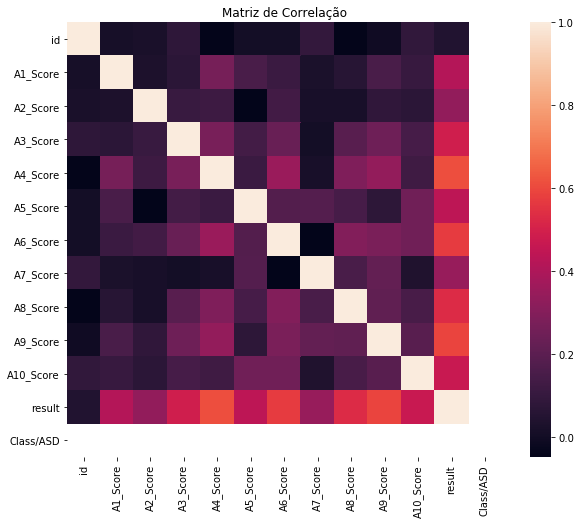

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

df['Class/ASD'] = df['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)
ax.set_title('Matriz de Correlação')